# Download NRR daily subcatchment mean data

This Notebooks downloads the daily Nationale Regenradar(NRR) data as a mean of a subcatchment. These precipitation data is used to estimate the S$_{u,max}$ parameter of HBV during the calibration. The data is downloaded via the Lizard platform of Nelen & Schuurmans and Royal HaskoningDHV (RHDHV) (2023).

Nelen & Schuurmans. (2023). <I>Welcome to the Lizard documentation! -- Lizard 2022.02 documentation.</I> Retrieved from: https://docs.lizard.net/a_lizard.html

## Import the required packages

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import *
from shapely import wkt
import time

C:\Users\924259\AppData\Local\Temp\ipykernel_20100\4112616365.py:4: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


## Define the input folder 

In [2]:
folder = 'C:/Users/924259/OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Precipitation - NRR\Subcatchments'

## Locate the subcatchments shapefile 

In [ ]:
shape = f'{folder}/GEU_Qstrgbd.shp'

## Read the shapefile

In [3]:
# Read the shapefile
gdf = gpd.read_file(shape)
# Reproject the shapefile to EPSG:4326
gdf.to_crs(4326, inplace=True)

In [4]:
gdf

,Qmeter,A_ha,Shape_Leng,Shape_Area,geometry
0,Sippenaeken,12330.665,48981.048619,1.233066e+08,"POLYGON ((5.97782 50.75779, 5.97802 50.75767, ..."
1,Hommerich,3085.801,26032.302283,3.085801e+07,"POLYGON ((5.91790 50.80742, 5.91974 50.80686, ..."
2,Meerssen,8171.443,67673.767766,8.171443e+07,"POLYGON ((5.79263 50.91687, 5.79339 50.91633, ..."
3,Eyserbeek,2711.808,31903.689180,2.711808e+07,"POLYGON ((5.99215 50.85195, 5.99231 50.85180, ..."
4,Selzerbeek,2874.285,28931.939955,2.874285e+07,"POLYGON ((5.96102 50.81920, 5.96130 50.81915, ..."
5,Gulp,4605.371,43303.162816,4.605371e+07,"POLYGON ((5.87040 50.82392, 5.87061 50.82365, ..."


<Axes: >

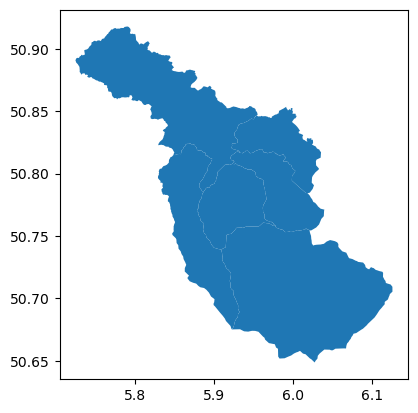

In [5]:
gdf.plot()

## Simplify the shapefile 

The shapefile is simplified to decrease the runtime and remove download errors.

In [6]:
gdf_simplified = gdf.simplify(0.001)

## Lizard password 

Define your Lizard username and password

In [7]:
headers = {
    'username': '__key__',
    'password': ''
}

## Download the precipitation data

In [41]:
results = {}
results_df = {}

for i in range(len(gdf)):
    # Define the API link
    url = f'https://rhdhv.lizard.net/api/v4/rasters/730d6675-35dd-4a35-aa9b-bfb8155f9ca7/zonal/?geom={str(gdf_simplified.geometry[i])}&zonal_statistic=mean&start=2010-01-01T00:00:00Z&end=2022-12-31T00:00:00Z&frequency=D&temporal_statistic=mean'
    # Log in to the API
    r = requests.get(url, headers=headers)
    # Get the results for a subcatchment
    results[gdf.Qmeter[i]] = r.json().get('results')
    # Create a new dataframe to store the data
    results_df[gdf.Qmeter[i]] = pd.DataFrame(results[gdf.Qmeter[i]])
    results_df[gdf.Qmeter[i]].set_index('time',inplace=True)
    results_df[gdf.Qmeter[i]].index = pd.to_datetime(results_df[gdf.Qmeter[i]].index)

## Inspect the downloaded data

<Axes: xlabel='time'>

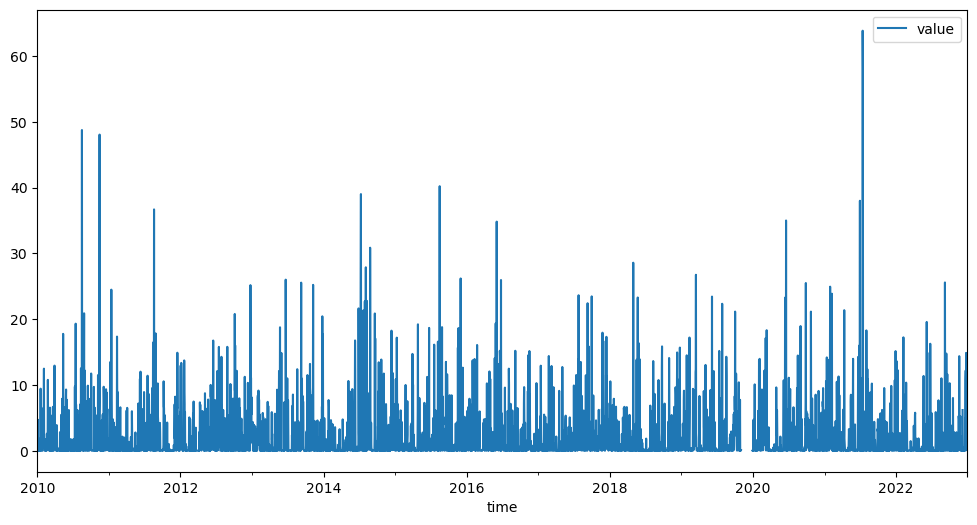

In [42]:
results_df['Meerssen'].plot(figsize=(12,6))

<Axes: xlabel='time'>

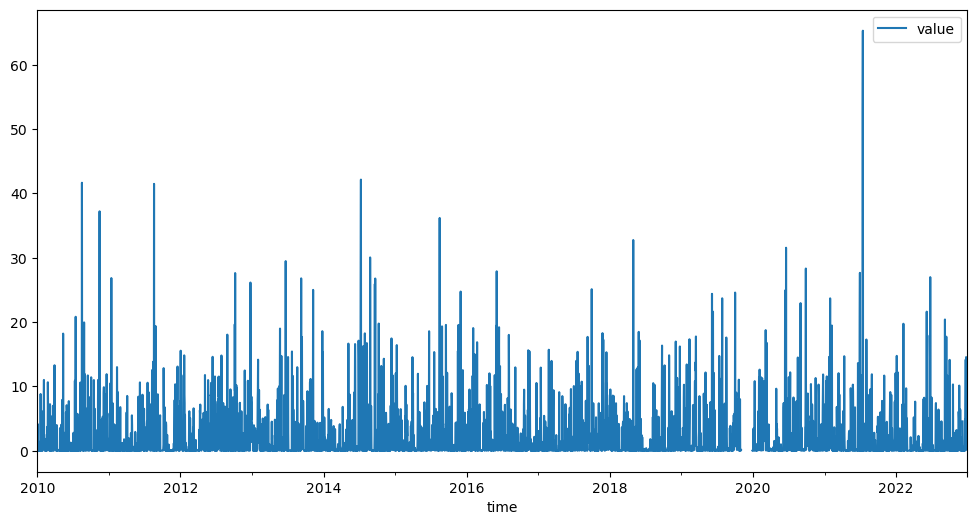

In [43]:
results_df['Gulp'].plot(figsize=(12,6))

<Axes: xlabel='time'>

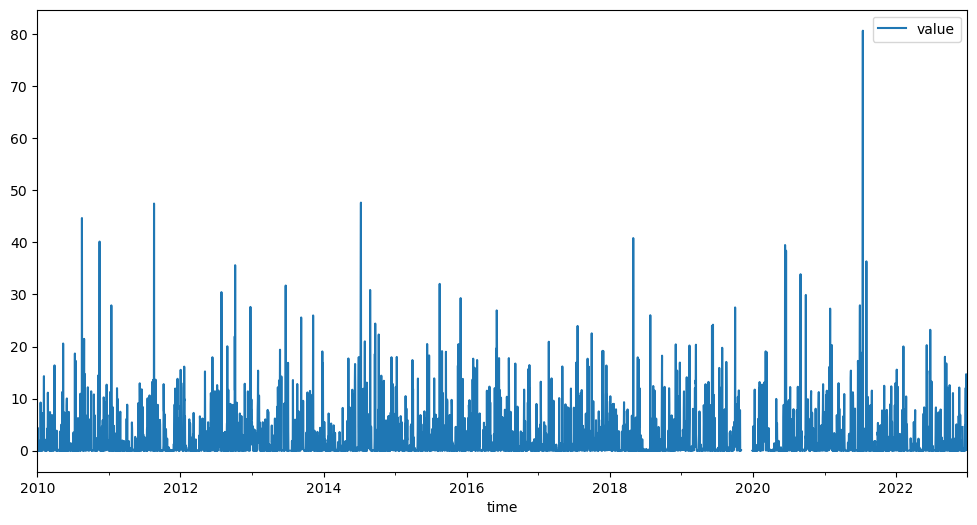

In [44]:
results_df['Selzerbeek'].plot(figsize=(12,6))

## Define the output folder

In [56]:
outmap = 'C:/Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Precipitation - NRR'

## Download the data as csv per subcatchment

In [ ]:
results_df['Sippenaeken'].to_csv(f'{outmap}/Subcatchments daily/Sippenaeken_daily.csv')
results_df['Hommerich'].to_csv(f'{outmap}/Subcatchments daily/Hommerich_daily.csv')
results_df['Meerssen'].to_csv(f'{outmap}/Subcatchments daily/Meerssen_daily.csv')
results_df['Eyserbeek'].to_csv(f'{outmap}/Subcatchments daily/Eyserbeek_daily.csv')
results_df['Selzerbeek'].to_csv(f'{outmap}/Subcatchments daily/Selzerbeek_daily.csv')
results_df['Gulp'].to_csv(f'{outmap}/Subcatchments daily/Gulp_daily.csv')